## Board slides for Food Startup

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat. FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and we have been enlisted to help decipher data and create a presentation to answer several key questions:
- What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
- How has the average order amount changed over time? What does this say about the trajectory of the company?
- How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

#### What cuisines does FoodWheel offer?
The board wants to make sure that FoodWheel offers a wide, diverse, variety of restaurants. Having many different options makes customers more likely to come back. We’ve been provided with a CSV, restaurants.csv , which contains all of the restaurants that partner with FoodWheel.

Let’s create pie chart showing the different types of cuisines available on FoodWheel.

In [3]:
# Import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Read database
restaurants = pd.read_csv("restaurants.csv")
# Inspect data
print(restaurants.head())
# Count unique cuisine types
cuisine_options_count = restaurants["cuisine"].nunique()
print(cuisine_options_count)
# Count restaurants of each cuisine
cuisine_counts = restaurants.groupby("cuisine").name.nunique().reset_index()
print(cuisine_counts)

   id                name neighborhood  cuisine
0   1          Jongro BBQ      Midtown   Korean
1   2            Pocha 32      Midtown   Korean
2   3  Nom Wah Tea Parlor    Chinatown  Chinese
3   4           Roberta's     Brooklyn    Pizza
4   5        Speedy Romeo     Brooklyn    Pizza
7
      cuisine  name
0    American    10
1     Chinese    11
2     Italian     8
3    Japanese     4
4      Korean     3
5       Pizza     4
6  Vegetarian     4


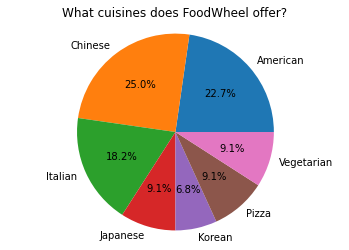

In [6]:
# Separate values
cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values
# Create a pie chart
plt.pie(counts, labels=cuisines, autopct="%0.1f%%")
plt.axis("equal")
plt.title("What cuisines does FoodWheel offer?")
plt.show()

#### Orders Over Time
FoodWheel is a relatively new startup. They launched in April, and have grown more popular since then. Management suspects that the average order size has increased over time. They’d like you to investigate if this claim is true and answer these questions:
- How has the average order amount changed over time?
- What does this say about the trajectory of the company?

In [10]:
# Read database
orders = pd.read_csv("orders.csv")
# Add month column
get_month = lambda x: x.split("-")[0]
orders["month"] = orders["date"].apply(get_month)
# Group orders by month and avg order price
avg_order = orders.groupby("month").price.mean().reset_index()
# Print the results
print(orders.head())
# Calculate standard deviation for error bars
std_order = orders.groupby("month").price.std().reset_index()

   id  customer_id       date  price month
0   1           61  6-18-2017   13.0     6
1   2          210   5-8-2017   21.0     5
2   3            0   9-7-2017   33.0     9
3   4           66   7-7-2017   19.0     7
4   5           65  4-26-2017   13.0     4


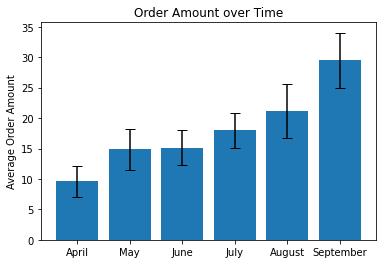

In [11]:
# Create a subplot
ax = plt.subplot(1,1,1)
# Save average prices and std for bar heights
bar_heights = avg_order["price"]
bar_errors = std_order["price"]
# Create a bar chart to visualize findings
plt.bar(range(len(bar_heights)), bar_heights, yerr=bar_errors, capsize=5)
# Give titles
ax.set_xticks(range(len(bar_heights)))
ax.set_xticklabels(["April", "May", "June", "July", "August", "September"])
plt.ylabel("Average Order Amount")
plt.title("Order Amount over Time")
plt.show()

#### Customer Types
There is a range of amounts that customers spend on FoodWheel. Let’s investigate and aim to answer our final question:
- How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

In [12]:
# Group order by customers and find amounts spent
customer_amount = orders.groupby("customer_id").price.sum().reset_index()
# Inspect data
print(customer_amount.head())

   customer_id  price
0            0   83.0
1            2   11.0
2            3   65.0
3            4   32.0
4            5  119.0


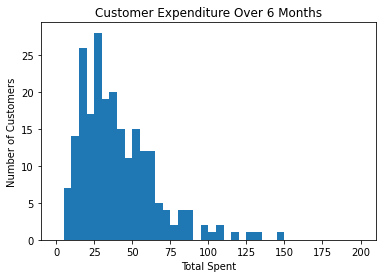

In [14]:
# Create a histogram
plt.hist(customer_amount.price.values, range=(0, 200), bins=40)
plt.xlabel("Total Spent")
plt.ylabel("Number of Customers")
plt.title("Customer Expenditure Over 6 Months")
plt.show()